In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [14]:
# import data
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: >

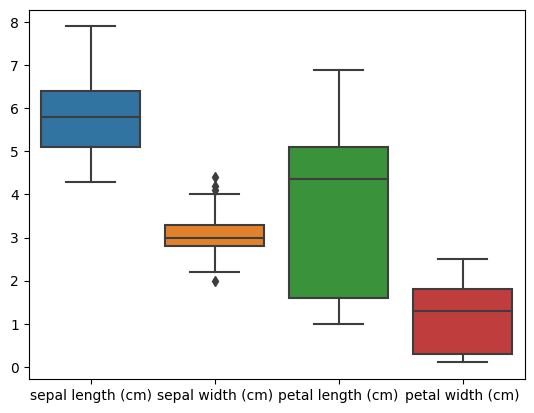

In [17]:
sb.boxplot(data = df)

<Axes: ylabel='Count'>

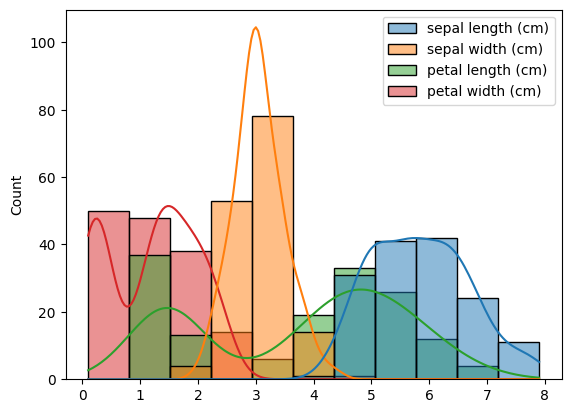

In [18]:
sb.histplot(data = df, kde = True)

<Axes: >

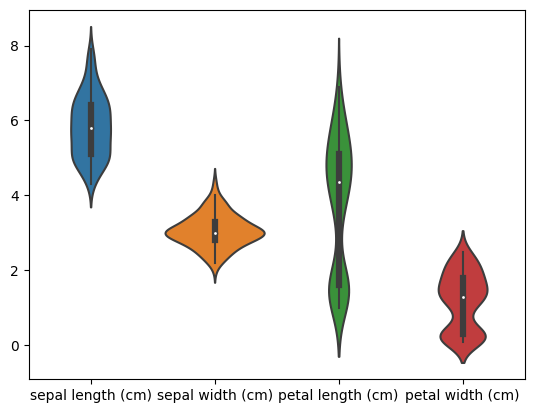

In [19]:
sb.violinplot (data = df)

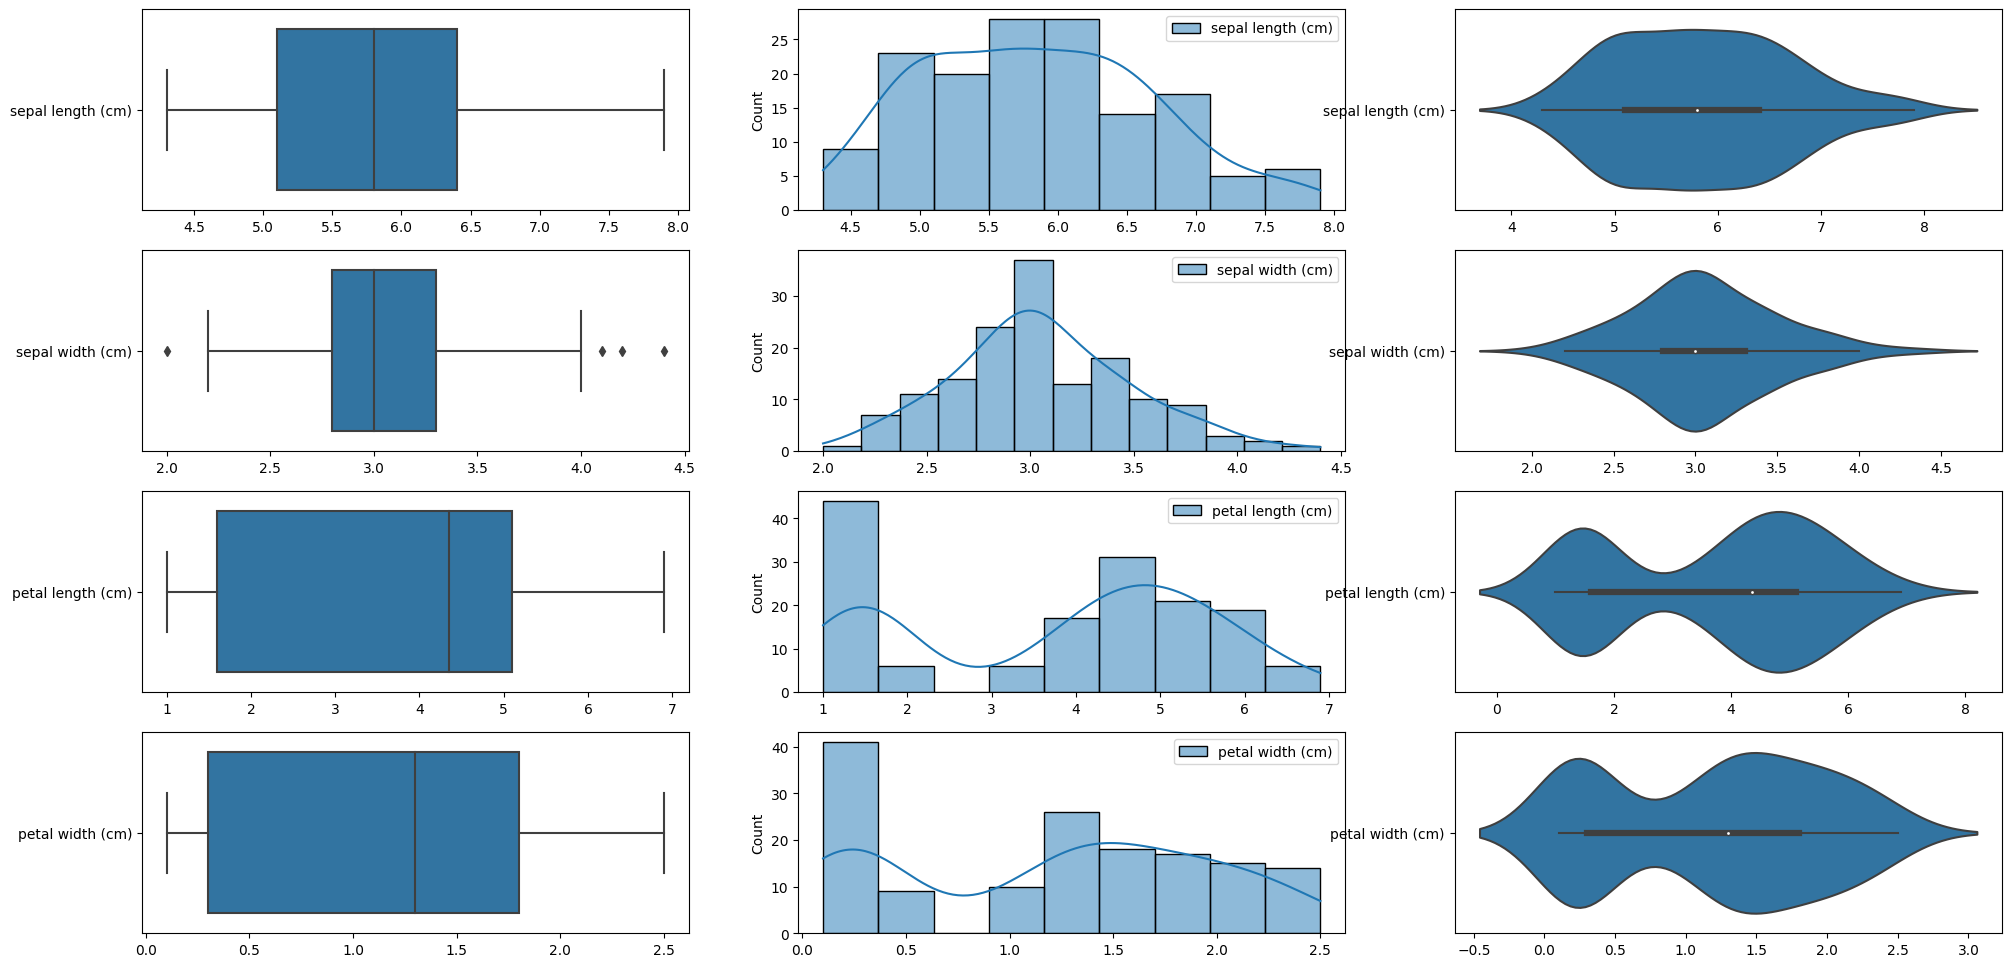

In [20]:
#set up matplotlib figure with three subplots
f , axes = plt.subplots(4, 3, figsize=(24,12))

for i in range(4):
    dft = pd.DataFrame(df.iloc[:, i])
    sb.boxplot(data=dft, orient = "h" , ax =axes[i,0])
    sb.histplot(data=dft, kde = True, ax =axes[i,1])
    sb.violinplot(data=dft, orient = "h" , ax =axes[i,2])

<Axes: >

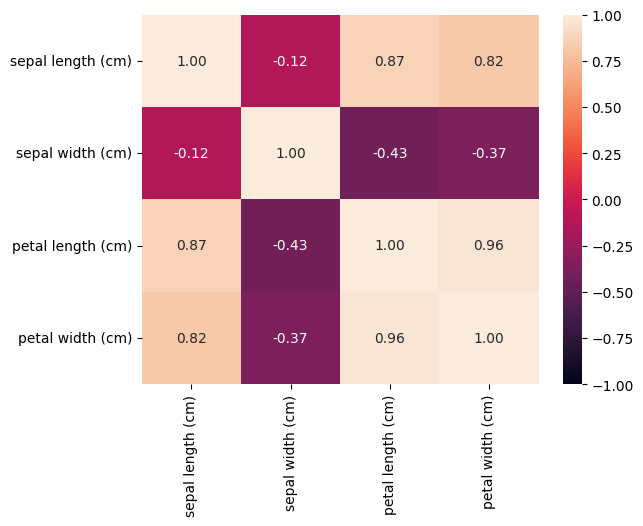

In [21]:
# visualise the correlation between the numerical variables
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

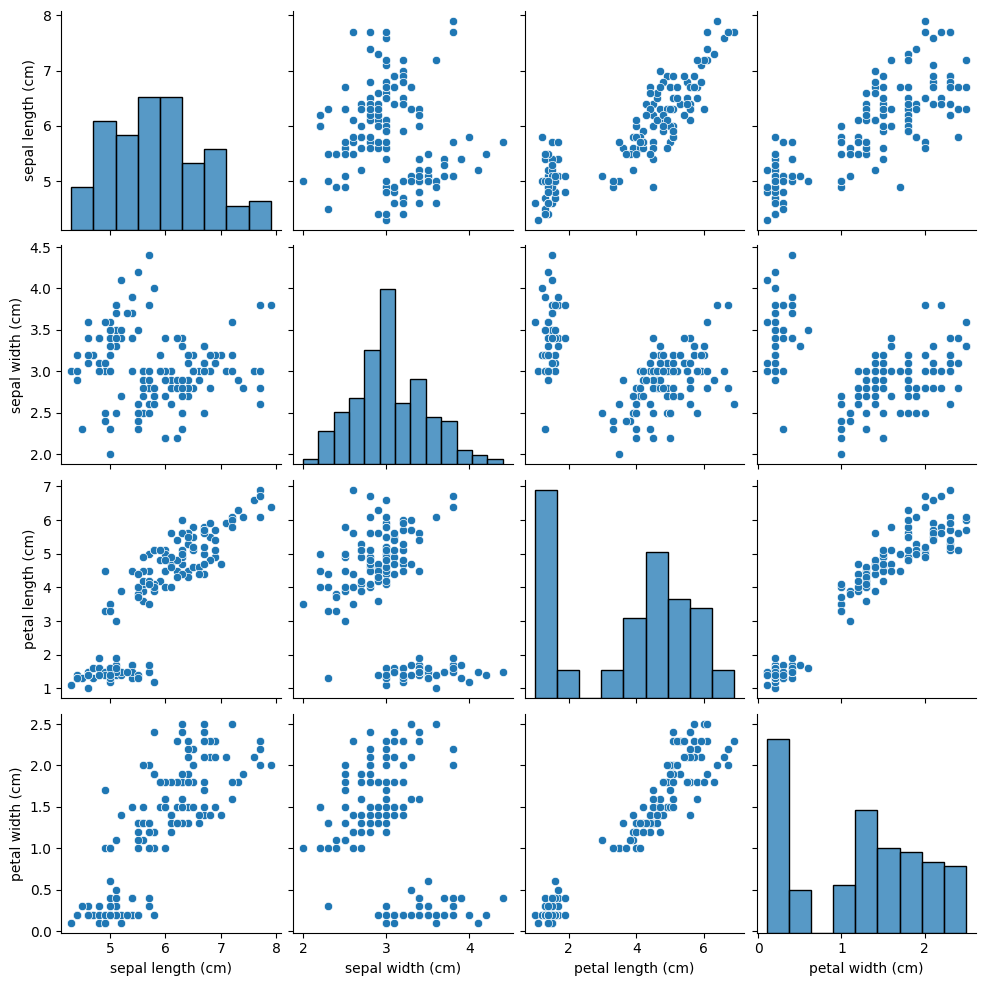

In [22]:
# Draw pairs of variables against one another
sb.pairplot(data = df)

In [23]:
# decision Tree classifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : range(2,15), 'criterion': ['entropy', 'gini']}
clf1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf1.fit(X=X_train, y=y_train)
tree_model = clf1.best_estimator_

print(clf1.best_score_, clf1.best_params_)
y_pred = tree_model.predict(X_test)

#Model Accuracy
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

0.9523809523809523 {'criterion': 'entropy', 'max_depth': 6}
Accuracy: 0.9777777777777777


In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(1,15),'weights':[ 'uniform', 'distance']}

from sklearn.neighbors import KNeighborsClassifier


clf2 = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=4)
clf2.fit(X=X_train, y=y_train)
knn_model = clf2.best_estimator_

print (clf2.best_score_, clf2.best_params_) 

y_pred = knn_model.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.961904761904762 {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9777777777777777


In [25]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(1,15),'criterion':['gini', 'entropy']}


clf3 = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4)
clf3.fit(X=X_train, y=y_train)
rf_model = clf3.best_estimator_

print (clf3.best_score_, clf3.best_params_) 

y_pred = rf_model.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.9523809523809523 {'criterion': 'gini', 'n_estimators': 1}
Accuracy: 0.9333333333333333


In [26]:
knn_model.predict([X_train[5],X_test[8],X_test[9]])

array([1, 1, 1])

In [27]:
tree_model.predict([X_train[3],X_test[5],X_test[7]])

array([2, 2, 1])

In [28]:
rf_model.predict([X_train[3],X_test[5],X_test[7]])

array([2, 2, 1])